In [6]:
import numpy as np
import random as rnd
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
combine = [train_df, test_df]

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [12]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


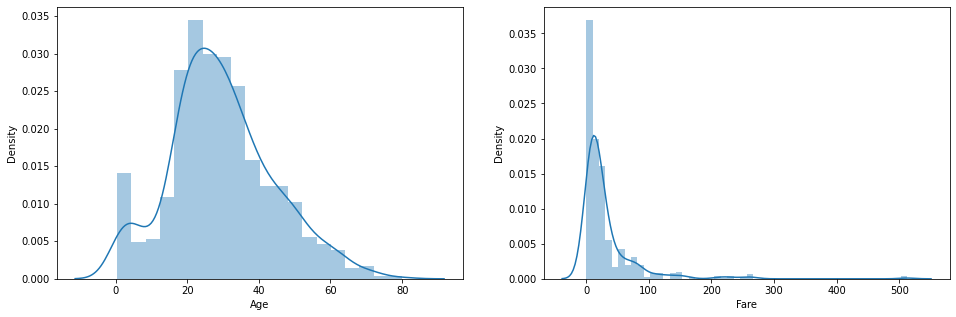

In [14]:
#CODE ADDED HERE
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(train_df['Age'])
plt.subplot(1,2,2)
sns.distplot(train_df['Fare'])
plt.show()

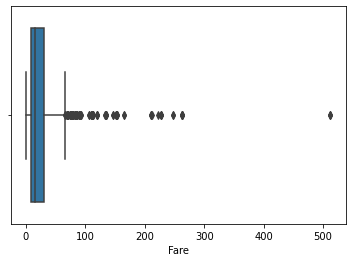

In [15]:
sns.boxplot(train_df['Fare'])

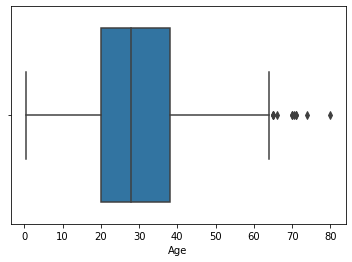

In [16]:
sns.boxplot(train_df['Age'])

In [17]:
#CODE ADDED HERE 
#OUTLIER DETECTION AND REMOVAL
Q1 = train_df.quantile(0.35)
Q3 = train_df.quantile(0.65)
IQR = Q3 - Q1
print(IQR)

PassengerId    267.0
Survived         1.0
Pclass           1.0
Age             10.0
SibSp            0.0
Parch            0.0
Fare            17.0
dtype: float64


In [18]:
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
train_df.shape

(446, 12)

In [19]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.462963
1,2,0.367816
2,3,0.203279


In [20]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.728261
1,male,0.146893


In [21]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
0,0,0.266816


In [22]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
0,0,0.266816


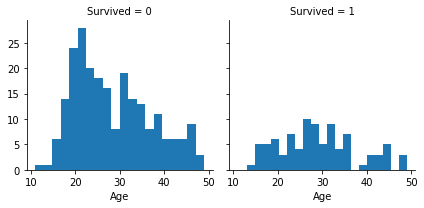

In [23]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

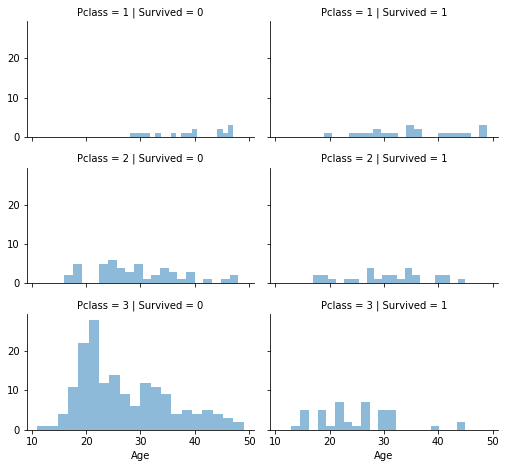

In [24]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

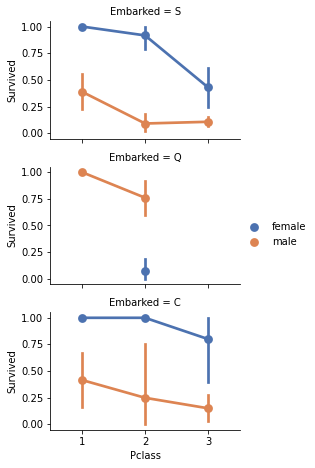

In [25]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

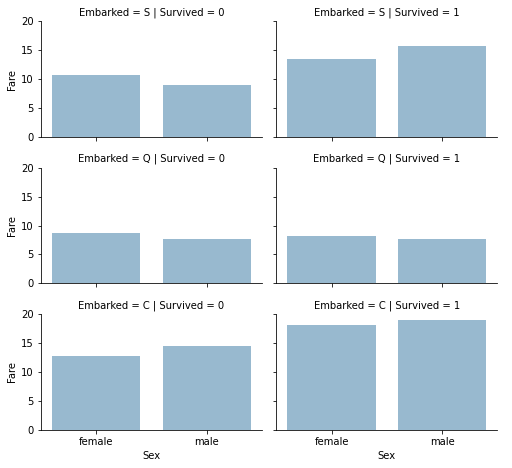

In [26]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [27]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (446, 12) (418, 11) (891, 12) (418, 11)


('After', (446, 10), (418, 9), (446, 10), (418, 9))

In [28]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Don,0,1
Dr,1,3
Jonkheer,0,1
Major,0,1
Miss,74,0
Mlle,1,0
Mr,0,346
Mrs,15,0
Ms,1,0


In [29]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Miss,0.684211
1,Mr,0.147399
2,Mrs,0.933333
3,Rare,0.222222


In [30]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,1
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,8.0500,S,1
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,7.8542,S,2


In [31]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((446, 9), (418, 9))

In [32]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
2,1,3,1,26.0,0,0,7.9250,S,2
4,0,3,0,35.0,0,0,8.0500,S,1
5,0,3,0,NaN,0,0,8.4583,Q,1
12,0,3,0,20.0,0,0,8.0500,S,1
14,0,3,1,14.0,0,0,7.8542,S,2


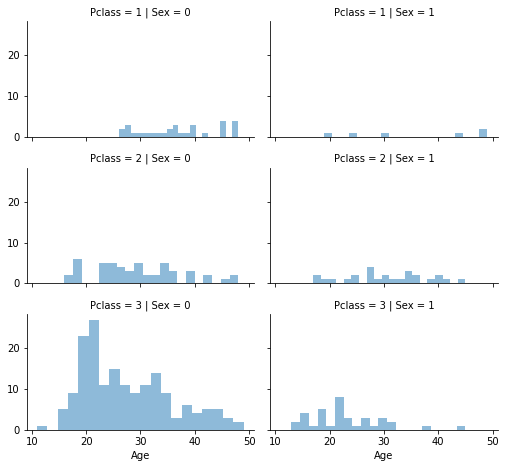

In [33]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [34]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [35]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
2,1,3,1,26,0,0,7.9250,S,2
4,0,3,0,35,0,0,8.0500,S,1
5,0,3,0,26,0,0,8.4583,Q,1
12,0,3,0,20,0,0,8.0500,S,1
14,0,3,1,14,0,0,7.8542,S,2


In [36]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(10.962, 18.6]",0.333333
1,"(18.6, 26.2]",0.209524
2,"(26.2, 33.8]",0.340206
3,"(33.8, 41.4]",0.281690
4,"(41.4, 49.0]",0.314286


In [37]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
2,1,3,1,1,0,0,7.9250,S,2,"(18.6, 26.2]"
4,0,3,0,2,0,0,8.0500,S,1,"(33.8, 41.4]"
5,0,3,0,1,0,0,8.4583,Q,1,"(18.6, 26.2]"
12,0,3,0,1,0,0,8.0500,S,1,"(18.6, 26.2]"
14,0,3,1,0,0,0,7.8542,S,2,"(10.962, 18.6]"


In [38]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
2,1,3,1,1,0,0,7.9250,S,2
4,0,3,0,2,0,0,8.0500,S,1
5,0,3,0,1,0,0,8.4583,Q,1
12,0,3,0,1,0,0,8.0500,S,1
14,0,3,1,0,0,0,7.8542,S,2


In [39]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
0,1,0.266816


In [40]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,1,0.266816


In [41]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
2,1,3,1,1,7.9250,S,2,1
4,0,3,0,2,8.0500,S,1,1
5,0,3,0,1,8.4583,Q,1,1
12,0,3,0,1,8.0500,S,1,1
14,0,3,1,0,7.8542,S,2,1


In [42]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
2,3,1,3
4,6,2,3
5,3,1,3
12,3,1,3
14,0,0,3
17,2,1,2
19,3,1,3
20,4,2,2
21,4,2,2
22,0,0,3


In [43]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [44]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,Q,0.425926
0,C,0.338983
2,S,0.228228


In [45]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
2,1,3,1,1,7.9250,0,2,1,3
4,0,3,0,2,8.0500,0,1,1,6
5,0,3,0,1,8.4583,2,1,1,3
12,0,3,0,1,8.0500,0,1,1,3
14,0,3,1,0,7.8542,0,2,1,0


In [46]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [47]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.75]",0.230159
1,"(7.75, 8.05]",0.190840
2,"(8.05, 13.0]",0.288288
3,"(13.0, 50.496]",0.423077


In [48]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
2,1,3,1,1,1,0,2,1,3
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
12,0,3,0,1,1,0,1,1,3
14,0,3,1,0,0,0,2,1,0
17,1,2,0,1,1,0,1,1,2
19,1,3,1,1,0,1,3,1,3
20,0,2,0,2,2,0,1,1,4
21,1,2,0,2,1,0,1,1,4
22,1,3,1,0,1,2,2,1,0


In [49]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone', 'Age*Class'],
      dtype='object')

In [50]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
2,1,3,1,1,1,0,2,1,3
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
12,0,3,0,1,1,0,1,1,3
14,0,3,1,0,0,0,2,1,0


In [51]:
#CODE ADDED HERE
#NORMALIZATION
#Import library
from sklearn.preprocessing import StandardScaler
X_train = train_df.drop("Survived", axis=1)

sc_X = StandardScaler()
sc_X = sc_X.fit_transform(X_train)
#Convert to table format - StandardScaler 
X_train= pd.DataFrame(data=sc_X, columns=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title','IsAlone', 'Age*Class'])
X_train.head()


,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0.625743,1.961588,-0.459106,0.320126,-0.542502,0.939436,0.0,0.00000
1,0.625743,-0.509791,1.548356,0.320126,-0.542502,-0.438815,0.0,2.34171
2,0.625743,-0.509791,-0.459106,0.320126,2.355175,-0.438815,0.0,0.00000
3,0.625743,-0.509791,-0.459106,0.320126,-0.542502,-0.438815,0.0,0.00000
4,0.625743,1.961588,-2.466567,-0.921405,-0.542502,0.939436,0.0,-2.34171


In [52]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a3d3b1990>,
      dtype=object)

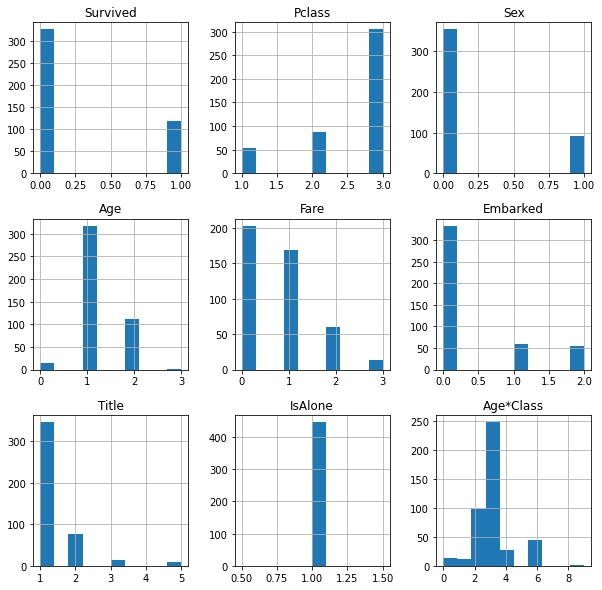

In [53]:
train_df.hist(figsize=(10,10))

In [54]:
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((446, 8), (446,), (418, 8))

In [55]:
Y_train.head()

2     1
4     0
5     0
12    0
14    0
Name: Survived, dtype: int64

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

83.18

In [57]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.181371
4,Embarked,0.205674
3,Fare,0.101817
2,Age,0.080774
6,IsAlone,0.000000
5,Title,-0.084656
7,Age*Class,-0.291612
0,Pclass,-0.450538


In [58]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

84.3

In [59]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.41

In [60]:

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.82

In [61]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron


75.56

In [62]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc


82.74

In [63]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.87

Task 1 - 2)

In [64]:
decision_tree = DecisionTreeClassifier(max_depth=12,criterion="entropy")
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.1

Task 1 - 2) Plotting the Tree

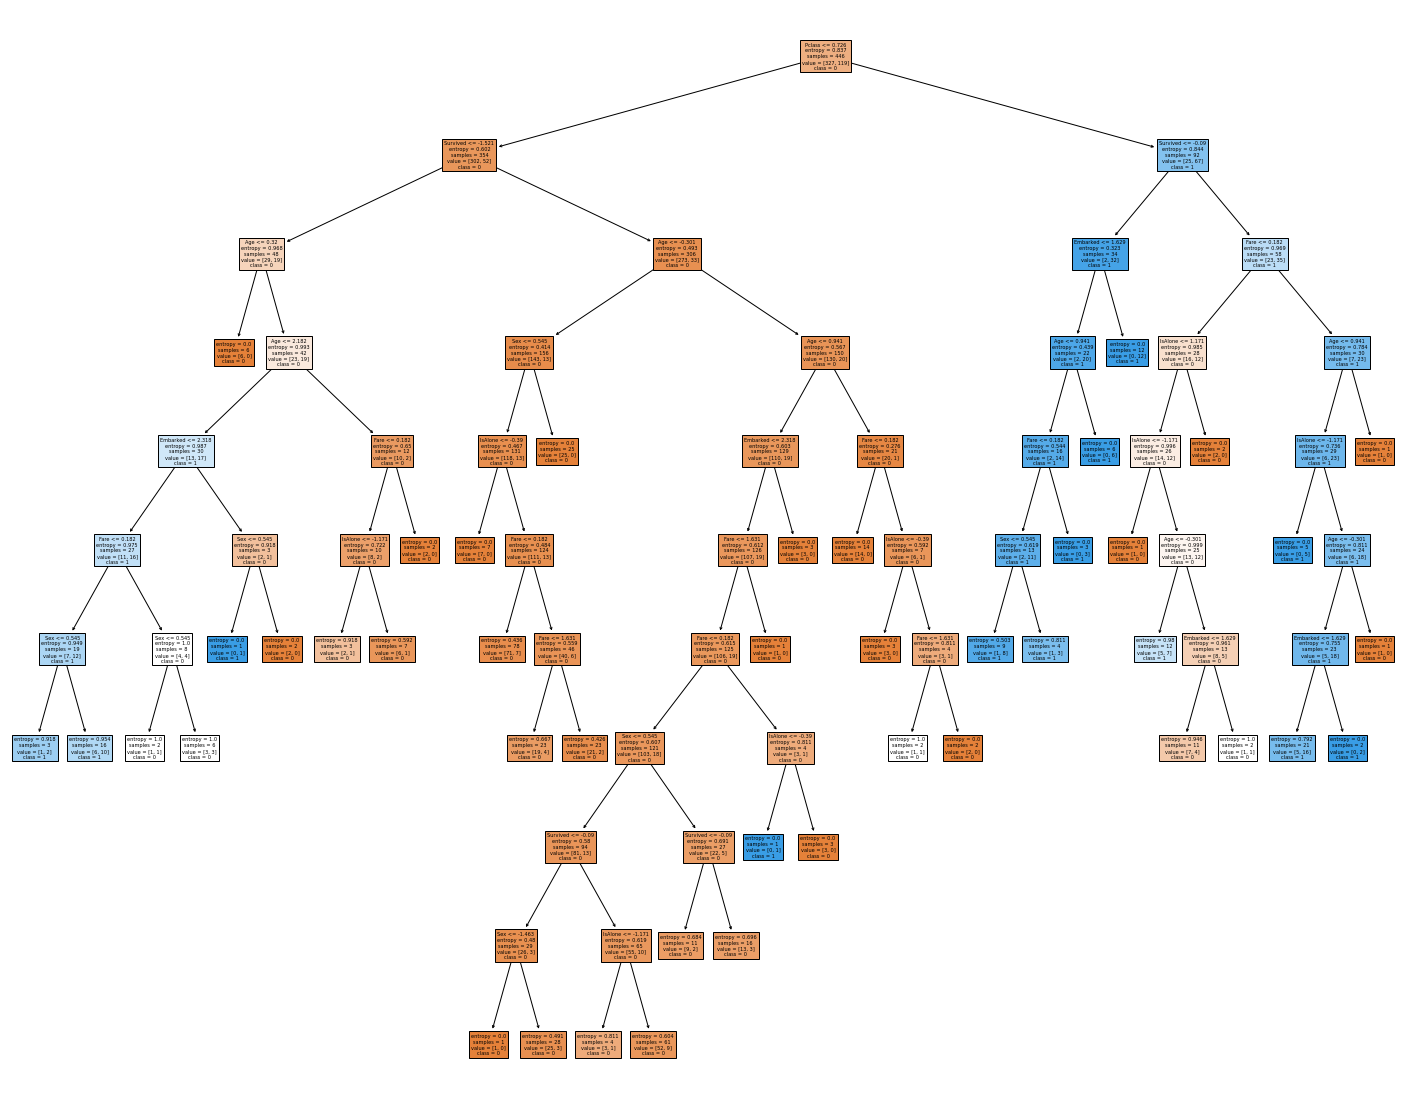

In [65]:
target_names=["0","1"]
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=train_df.columns,  
                   class_names=target_names,
                   filled=True)


Task 1 - 3)

In [66]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(decision_tree, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.807 (0.022)


In [67]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


86.1

Task 1 - 4)

In [68]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)

scores = cross_val_score(random_forest, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.816 (0.023)


In [69]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)



,Model,Score
3,Random Forest,86.10
8,Decision Tree,86.10
0,Support Vector Machines,84.30
1,KNN,83.41
2,Logistic Regression,83.18
7,Linear SVC,82.74
4,Naive Bayes,79.82
5,Perceptron,75.56
6,Stochastic Gradient Decent,72.87
